# Home CO2 emissions
> An intro to CO2 accounting with Jupyter notebooks.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter,climate]
- image: images/chart-preview.png

In [9]:
#%pip install arrow python-dotenv influxdb

import os
import datetime as dt

import arrow
import pandas as pd
import matplotlib.pyplot as plt

from util import get_gridwatch_data

import matplotlib.rc
figsize=(20,6)

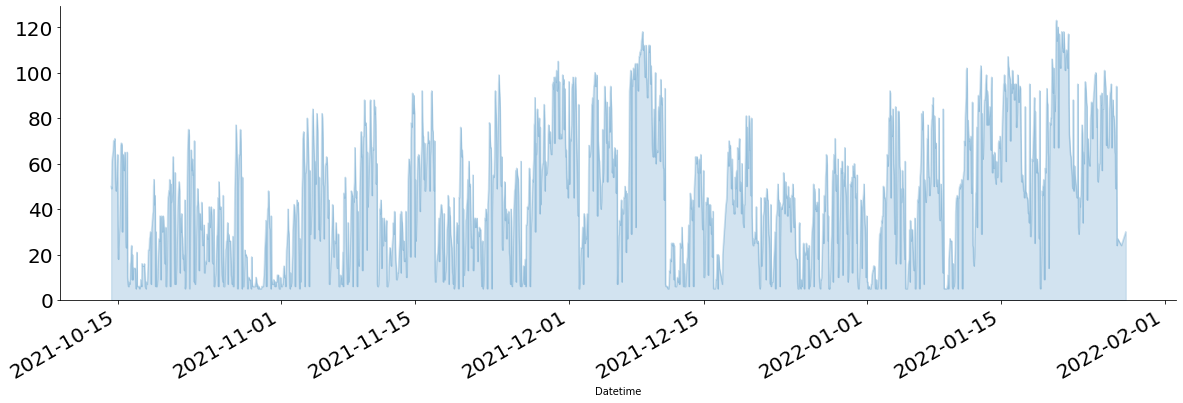

In [13]:
df_gridwatch = get_gridwatch_data()

df_gridwatch["CO2e INTENSITY (g/kWh)"].plot.area(
    figsize=(20,6),
    fontsize=20,
    alpha=0.2
)
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

In [17]:
df_gridwatch["ONTARIO DEMAND (MW)"].plot(
    figsize=figsize
)

NameError: name 'figsize' is not defined

# About

This notebook is a demonstration of some of capabilities of [fastpages](https://github.com/fastai/fastpages) with notebooks.


With `fastpages` you can save your jupyter notebooks into the `_notebooks` folder at the root of your repository, and they will be automatically be converted to Jekyll compliant blog posts!


## Front Matter

The first cell in your Jupyter Notebook or markdown blog post contains front matter. Front matter is metadata that can turn on/off options in your Notebook. It is formatted like this:

```
# "My Title"
> "Awesome summary"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Hamel Husain & Jeremy Howard
- categories: [fastpages, jupyter]
```

- Setting `toc: true` will automatically generate a table of contents
- Setting `badges: true` will automatically include GitHub and Google Colab links to your notebook.
- Setting `comments: true` will enable commenting on your blog post, powered by [utterances](https://github.com/utterance/utterances).

The title and description need to be enclosed in double quotes only if they include special characters such as a colon. More details and options for front matter can be viewed on the [front matter section](https://github.com/fastai/fastpages#front-matter-related-options) of the README.

## Markdown Shortcuts

A `#hide` comment at the top of any code cell will hide **both the input and output** of that cell in your blog post.

A `#hide_input` comment at the top of any code cell will **only hide the input** of that cell.

In [3]:
#hide_input
print('The comment #hide_input was used to hide the code that produced this.')

The comment #hide_input was used to hide the code that produced this.


put a `#collapse-hide` flag at the top of any cell if you want to **hide** that cell by default, but give the reader the option to show it:

In [4]:
#collapse-hide
import pandas as pd
import altair as alt

ModuleNotFoundError: No module named 'altair'

put a `#collapse-show` flag at the top of any cell if you want to **show** that cell by default, but give the reader the option to hide it:

In [ ]:
#collapse-show
cars = 'https://vega.github.io/vega-datasets/data/cars.json'
movies = 'https://vega.github.io/vega-datasets/data/movies.json'
sp500 = 'https://vega.github.io/vega-datasets/data/sp500.csv'
stocks = 'https://vega.github.io/vega-datasets/data/stocks.csv'
flights = 'https://vega.github.io/vega-datasets/data/flights-5k.json'

place a `#collapse-output` flag at the top of any cell if you want to put the output under a collapsable element that is closed by default, but give the reader the option to open it:

In [ ]:
#collapse-output
print('The comment #collapse-output was used to collapse the output of this cell by default but you can expand it.')

## Interactive Charts With Altair

Charts made with Altair remain interactive.  Example charts taken from [this repo](https://github.com/uwdata/visualization-curriculum), specifically [this notebook](https://github.com/uwdata/visualization-curriculum/blob/master/altair_interaction.ipynb).

In [ ]:
# hide
df = pd.read_json(movies) # load movies data
df.columns = [x.replace(' ', '_') for x in df.columns.values]
genres = df['Major_Genre'].unique() # get unique field values
genres = list(filter(lambda d: d is not None, genres)) # filter out None values
genres.sort() # sort alphabetically

In [ ]:
#hide
mpaa = ['G', 'PG', 'PG-13', 'R', 'NC-17', 'Not Rated']

### Example 1: DropDown

In [ ]:
# single-value selection over [Major_Genre, MPAA_Rating] pairs
# use specific hard-wired values as the initial selected values
selection = alt.selection_single(
    name='Select',
    fields=['Major_Genre', 'MPAA_Rating'],
    init={'Major_Genre': 'Drama', 'MPAA_Rating': 'R'},
    bind={'Major_Genre': alt.binding_select(options=genres), 'MPAA_Rating': alt.binding_radio(options=mpaa)}
)
  
# scatter plot, modify opacity based on selection
alt.Chart(df).mark_circle().add_selection(
    selection
).encode(
    x='Rotten_Tomatoes_Rating:Q',
    y='IMDB_Rating:Q',
    tooltip='Title:N',
    opacity=alt.condition(selection, alt.value(0.75), alt.value(0.05))
)

### Example 2: Tooltips

In [ ]:
alt.Chart(df).mark_circle().add_selection(
    alt.selection_interval(bind='scales', encodings=['x'])
).encode(
    alt.X('Rotten_Tomatoes_Rating', type='quantitative'),
    alt.Y('IMDB_Rating', type='quantitative', axis=alt.Axis(minExtent=30)),
#     y=alt.Y('IMDB_Rating:Q', ), # use min extent to stabilize axis title placement
    tooltip=['Title:N', 'Release_Date:N', 'IMDB_Rating:Q', 'Rotten_Tomatoes_Rating:Q']
).properties(
    width=500,
    height=400
)

### Example 3: More Tooltips

In [ ]:
# select a point for which to provide details-on-demand
label = alt.selection_single(
    encodings=['x'], # limit selection to x-axis value
    on='mouseover',  # select on mouseover events
    nearest=True,    # select data point nearest the cursor
    empty='none'     # empty selection includes no data points
)

# define our base line chart of stock prices
base = alt.Chart().mark_line().encode(
    alt.X('date:T'),
    alt.Y('price:Q', scale=alt.Scale(type='log')),
    alt.Color('symbol:N')
)

alt.layer(
    base, # base line chart
    
    # add a rule mark to serve as a guide line
    alt.Chart().mark_rule(color='#aaa').encode(
        x='date:T'
    ).transform_filter(label),
    
    # add circle marks for selected time points, hide unselected points
    base.mark_circle().encode(
        opacity=alt.condition(label, alt.value(1), alt.value(0))
    ).add_selection(label),

    # add white stroked text to provide a legible background for labels
    base.mark_text(align='left', dx=5, dy=-5, stroke='white', strokeWidth=2).encode(
        text='price:Q'
    ).transform_filter(label),

    # add text labels for stock prices
    base.mark_text(align='left', dx=5, dy=-5).encode(
        text='price:Q'
    ).transform_filter(label),
    
    data=stocks
).properties(
    width=500,
    height=400
)

## Data Tables

You can display tables per the usual way in your blog:

In [ ]:
# display table with pandas
df[['Title', 'Worldwide_Gross', 
    'Production_Budget', 'Distributor', 'MPAA_Rating', 'IMDB_Rating', 'Rotten_Tomatoes_Rating']].head()

## Images

### Local Images

You can reference local images and they will be copied and rendered on your blog automatically.  You can include these with the following markdown syntax:

`![](my_icons/fastai_logo.png)`

![](my_icons/fastai_logo.png)

### Remote Images

Remote images can be included with the following markdown syntax:

`![](https://image.flaticon.com/icons/svg/36/36686.svg)`

![](https://image.flaticon.com/icons/svg/36/36686.svg)

### Animated Gifs

Animated Gifs work, too!

`![](https://upload.wikimedia.org/wikipedia/commons/7/71/ChessPawnSpecialMoves.gif)`

![](https://upload.wikimedia.org/wikipedia/commons/7/71/ChessPawnSpecialMoves.gif)

### Captions

You can include captions with markdown images like this:

```
![](https://www.fast.ai/images/fastai_paper/show_batch.png "Credit: https://www.fast.ai/2020/02/13/fastai-A-Layered-API-for-Deep-Learning/")
```


![](https://www.fast.ai/images/fastai_paper/show_batch.png "Credit: https://www.fast.ai/2020/02/13/fastai-A-Layered-API-for-Deep-Learning/")





# Other Elements

## GitHub Flavored Emojis

Typing `I give this post two :+1:!` will render this:

I give this post two :+1:!

## Tweetcards

Typing `> twitter: https://twitter.com/jakevdp/status/1204765621767901185?s=20` will render this:

> twitter: https://twitter.com/jakevdp/status/1204765621767901185?s=20

## Youtube Videos

Typing `> youtube: https://youtu.be/XfoYk_Z5AkI` will render this:


> youtube: https://youtu.be/XfoYk_Z5AkI

## Boxes / Callouts 

Typing `> Warning: There will be no second warning!` will render this:


> Warning: There will be no second warning!



Typing `> Important: Pay attention! It's important.` will render this:

> Important: Pay attention! It's important.



Typing `> Tip: This is my tip.` will render this:

> Tip: This is my tip.



Typing `> Note: Take note of this.` will render this:

> Note: Take note of this.



Typing `> Note: A doc link to [an example website: fast.ai](https://www.fast.ai/) should also work fine.` will render in the docs:

> Note: A doc link to [an example website: fast.ai](https://www.fast.ai/) should also work fine.

## Footnotes

You can have footnotes in notebooks, however the syntax is different compared to markdown documents. [This guide provides more detail about this syntax](https://github.com/fastai/fastpages/blob/master/_fastpages_docs/NOTEBOOK_FOOTNOTES.md), which looks like this:

```
{% raw %}For example, here is a footnote {% fn 1 %}.
And another {% fn 2 %}
{{ 'This is the footnote.' | fndetail: 1 }}
{{ 'This is the other footnote. You can even have a [link](www.github.com)!' | fndetail: 2 }}{% endraw %}
```

For example, here is a footnote {% fn 1 %}.

And another {% fn 2 %}

{{ 'This is the footnote.' | fndetail: 1 }}
{{ 'This is the other footnote. You can even have a [link](www.github.com)!' | fndetail: 2 }}